<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/linear_regression_motivation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Import Libraries**

In [1]:
import jax.numpy as jnp
import numpy as np
import jax
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd

#### **Define Function**

In [2]:
def f(x):
  return x + jnp.sin(x)

#### **Generate Data**

In [3]:
n = 100
xs = jnp.linspace(-3, 3, n)
ys0 = jax.vmap(f)(xs)
ys1 = ys0 + jax.random.normal(jax.random.PRNGKey(0), (n,))

#### **Fit Linear Model**

In [4]:
# Convert jax arrays to numpy arrays
y_np = np.array(ys1)
x_np = np.array(xs)

# Create pandas DataFrame
df = pd.DataFrame({'y': y_np, 'x': x_np})

# Define and fit the model
model = smf.ols(formula='y ~ x', data=df)
result = model.fit()

# Print the summary of the regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     511.3
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           1.14e-40
Time:                        19:17:51   Log-Likelihood:                -148.02
No. Observations:                 100   AIC:                             300.0
Df Residuals:                      98   BIC:                             305.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0821      0.107      0.765      0.4

#### **Plot Data**

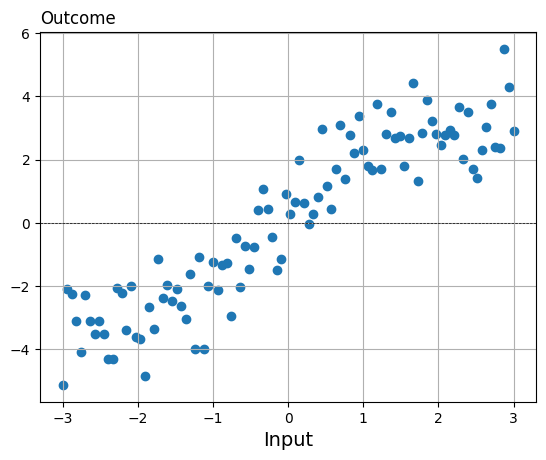

In [5]:
fig, ax = plt.subplots()
plt.scatter(xs, ys1)
plt.title("Outcome", loc='left')
plt.xlabel("Input", size=14)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Mean line
plt.grid(True)
fig.savefig('normal_distribution.png')
plt.show()

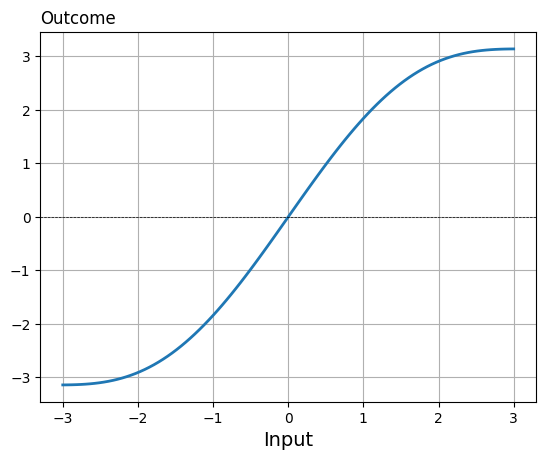

In [6]:
fig, ax = plt.subplots()
plt.plot(xs, ys0, linewidth=2)
plt.title("Outcome", loc='left')
plt.xlabel("Input", size=14)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Mean line
plt.grid(True)
fig.savefig('normal_distribution_true.png')
plt.show()

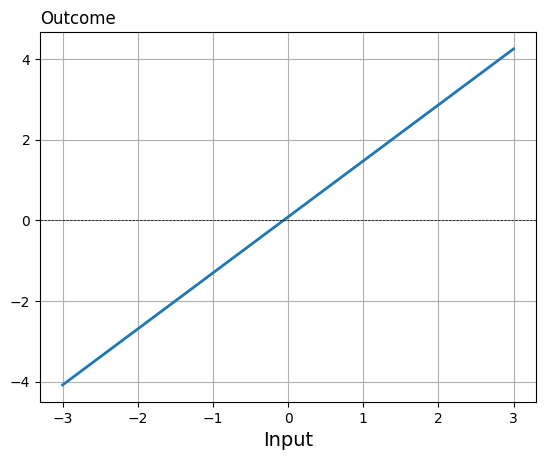

In [11]:
# Get the slope and intercept from the model
intercept, slope = result.params

ys1_hat = intercept + slope * xs

# Plot the data points
fig, ax = plt.subplots()
plt.plot(xs, ys1_hat, label='Data Points', linewidth=2)
plt.title("Outcome", loc='left')
plt.xlabel("Input", size=14)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Mean line
plt.grid(True)
fig.savefig('lbf.png')
plt.show()